## Corner plots of mcmc inversion

In [11]:
import corner
import emcee
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import glob
matplotlib.rc('pdf', fonttype=42)

plt.style.use("/home/mchristo/proj/libmsc/style/msc.mplstyle")

In [49]:
sampler = emcee.backends.HDFBackend("./augustineInversion/yang_nish_fixgeom_6.h5")
samps = sampler.get_chain(discard=500, thin=1, flat=True)
print(np.median(samps, axis=0))

[ -69.89227181  -57.80284509 3500.38974832]


## Fixed geometry MCMC

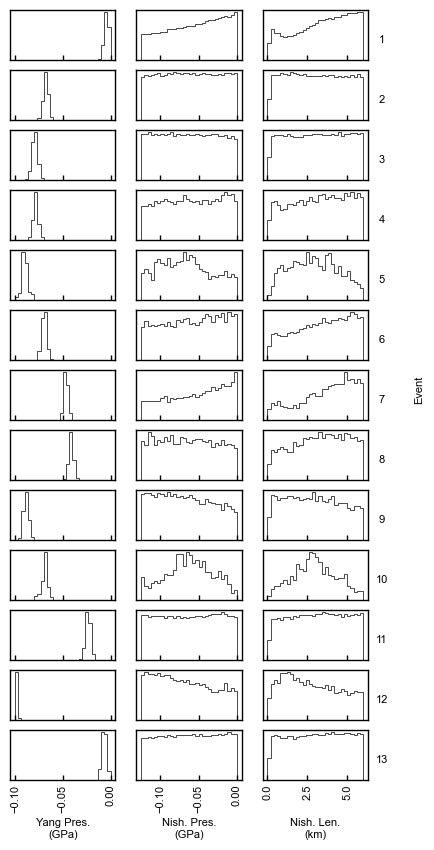

In [50]:
fig, axs = plt.subplots(13, 3, figsize=((6/13)*10, 10))

# Plot pressures and nishimura length
labels = ["Yang Pres.\n(GPa)", "Nish. Pres.\n(GPa)", "Nish. Len.\n(km)"]

events = np.arange(13)+1

files = ["./augustineInversion/yang_nish_fixgeom_%d.h5" % i for i in range(1, 14)]

for i, file in enumerate(files):
    sampler = emcee.backends.HDFBackend(file)

    samps = sampler.get_chain(discard=100, thin=1, flat=True)
    #print(len(samps))
    
    # Scale parameters
    psamps = np.copy(samps)
    psamps /= 1e3

    for j in range(3):
        axs[i,j].grid(False)
        if(j == 2):
            r = (0, 6)
        elif(j==1):
            r = (-.125, 0)
        elif(j==0):
            r = (-.1, 0)
        axs[i,j].axis("on")
        axs[i,j].hist(psamps[:, j], histtype="step", color="k", linewidth=.5, range=r, bins=30)
        axs[i,j].tick_params(axis="both", left=False, labelleft=False, labelbottom=False, direction="in", right=False, top=False)
        if(i == 12):
            axs[i,j].tick_params(axis="x", labelbottom=True, labelrotation=90, labelsize=8)
            axs[i,j].set_xlabel(labels[j], fontsize=8)
        if(j == 2):
            axs[i,j].set_ylabel(events[i], rotation=0, labelpad=10, fontsize=8)
            axs[i,j].yaxis.set_label_position('right') 

fig.supylabel("Event", fontsize=8, x=1, rotation=90)

fig.align_ylabels(axs=axs[:,2])
fig.align_xlabels(axs=axs[12,:])

fig.savefig("./figs/mcmc_yang_nish_fixgeom_fmt.pdf", bbox_inches="tight")
